In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import datetime
import collections
from collections import Counter
import glob

In [3]:
# パスで指定したファイルの一覧をリスト形式で取得. （ここでは一階層下のtestファイル以下）
csv_files = glob.glob('20210612/*.csv')

#読み込むファイルのリストを表示
for a in csv_files:
    print(a)

#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file))

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list, axis=0, sort=True)

df.to_csv("20210612/total0612.csv",index=False)

20210612/rsdata_20210612_141850.csv
20210612/rsdata_20210612_180003.csv
20210612/rsdata_20210612_182600.csv
20210612/rsdata_20210612_165514.csv
20210612/rsdata_20210612_135451.csv
20210612/rsdata_20210612_113333.csv
20210612/rsdata_20210612_104049.csv
20210612/rsdata_20210612_175317.csv
20210612/rsdata_20210612_135055.csv
20210612/rsdata_20210612_201412.csv
20210612/rsdata_20210612_103041.csv
20210612/rsdata_20210612_172041.csv
20210612/rsdata_20210612_153258.csv
20210612/rsdata_20210612_121433.csv
20210612/rsdata_20210612_161956.csv
20210612/rsdata_20210612_155211.csv
20210612/rsdata_20210612_191723.csv
20210612/rsdata_20210612_180612.csv
20210612/rsdata_20210612_124600.csv
20210612/rsdata_20210612_084139.csv
20210612/rsdata_20210612_122649.csv
20210612/rsdata_20210612_211005.csv
20210612/rsdata_20210612_153705.csv
20210612/rsdata_20210612_142543.csv
20210612/rsdata_20210612_173013.csv
20210612/rsdata_20210612_183109.csv
20210612/rsdata_20210612_181642.csv
20210612/rsdata_20210612_110

In [5]:
#csvの読み込み
df_timeid = pd.read_csv('20210610/total0612.csv', header=None, usecols=[0,1])
df_timeid.columns = ['Time', 'Id']
print(df_timeid)

FileNotFoundError: [Errno 2] No such file or directory: '20210610/total0612.csv'

In [4]:
#IDごとにまとめる
df_timeid = df_timeid.sort_values(['Id', 'Time'])
all_dict = {}

for id in sorted(set(df_timeid['Id'])):
    print('id', id)
    print(df_timeid[df_timeid['Id'] == id])
    all_dict[id] = df_timeid[df_timeid['Id'] == id]

id 26
                             Time  Id
2      2021-06-10 15:56:06.845625  26
7      2021-06-10 15:56:07.000041  26
11     2021-06-10 15:56:07.140177  26
16     2021-06-10 15:56:07.245683  26
21     2021-06-10 15:56:07.327327  26
...                           ...  ..
9973   2021-06-10 15:58:41.100601  26
9980   2021-06-10 15:58:41.183513  26
9987   2021-06-10 15:58:41.265947  26
9995   2021-06-10 15:58:41.348680  26
10001  2021-06-10 15:58:41.431409  26

[1878 rows x 2 columns]
id 123
                            Time   Id
4     2021-06-10 15:56:06.845625  123
9     2021-06-10 15:56:07.000041  123
14    2021-06-10 15:56:07.140177  123
19    2021-06-10 15:56:07.245683  123
24    2021-06-10 15:56:07.327327  123
...                          ...  ...
1967  2021-06-10 15:56:43.349910  123
1972  2021-06-10 15:56:43.432536  123
1977  2021-06-10 15:56:43.514851  123
1981  2021-06-10 15:56:43.597441  123
1987  2021-06-10 15:56:43.679698  123

[403 rows x 2 columns]
id 178
                   

id 255
                            Time   Id
9704  2021-06-10 15:58:37.807891  255
9711  2021-06-10 15:58:37.890578  255
9718  2021-06-10 15:58:37.972991  255
9731  2021-06-10 15:58:38.137803  255
9746  2021-06-10 15:58:38.301529  255
9753  2021-06-10 15:58:38.384230  255
9760  2021-06-10 15:58:38.466122  255
9777  2021-06-10 15:58:38.714178  255
9784  2021-06-10 15:58:38.796712  255
9791  2021-06-10 15:58:38.879452  255
9798  2021-06-10 15:58:38.961954  255
9811  2021-06-10 15:58:39.127301  255
9818  2021-06-10 15:58:39.209250  255
9843  2021-06-10 15:58:39.537728  255
9851  2021-06-10 15:58:39.620336  255
9866  2021-06-10 15:58:39.785519  255
9889  2021-06-10 15:58:40.031420  255
9918  2021-06-10 15:58:40.360970  255
9932  2021-06-10 15:58:40.525955  255
id 256
                            Time   Id
9732  2021-06-10 15:58:38.137803  256
id 257
                             Time   Id
9958   2021-06-10 15:58:40.853665  257
9984   2021-06-10 15:58:41.183513  257
10004  2021-06-10 15:58:41

In [7]:
#滞在時間を計算
#print(all_dict[26]["Time"].iloc[0])
#print(all_dict[26]["Time"].iloc[-1])

start = datetime.datetime.strptime(all_dict[26]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
end = datetime.datetime.strptime(all_dict[26]["Time"].iloc[-1].split(".")[0], "%Y-%m-%d %H:%M:%S")
print(start,end,(end-start).seconds)

2021-06-10 15:56:06 2021-06-10 15:58:41 155


In [68]:
#list_time内に滞在時間を格納(3秒以下は削除)
time_dict={}
time_dictx={}
for id in all_dict:
        start = datetime.datetime.strptime(all_dict[id]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
        end = datetime.datetime.strptime(all_dict[id]["Time"].iloc[-1].split(".")[0], "%Y-%m-%d %H:%M:%S")
        #print(start,end,(end-start).seconds)
        T = (end - start).seconds
        if T < 3:
            id = 0
        else:
            time_dict[id] = T
print(time_dict)

{26: 155, 123: 37, 178: 30, 180: 20, 198: 4, 200: 31, 204: 127, 205: 5, 208: 119, 210: 94, 211: 5, 213: 6, 214: 3, 215: 15, 227: 18, 229: 79, 233: 5, 234: 10, 236: 61, 241: 8, 242: 25, 244: 3, 246: 8, 254: 8, 255: 3}


In [104]:
#分毎の訪問者数
start_list = []
for id in time_dict:
        start = datetime.datetime.strptime(all_dict[id]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
        start_list.append(start.strftime("%Y/%m/%d %H:%M"))
c = collections.Counter(start_list)
print(c)
df_visitor = pd.DataFrame.from_dict(c, orient='index').reset_index()
df_visitor.columns = ['Time', 'Visitor']
df_visitor

Counter({'2021/06/10 15:56': 11, '2021/06/10 15:57': 8, '2021/06/10 15:58': 6})


,Time,Visitor
0,2021/06/10 15:56,11
1,2021/06/10 15:57,8
2,2021/06/10 15:58,6


<AxesSubplot:xlabel='Time'>

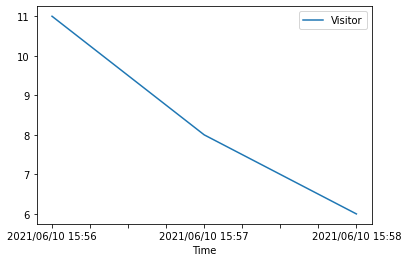

In [108]:
df_visitor.plot(x='Time', y='Visitor')